In [1]:
#download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-01-11 02:03:55--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-01-11 02:03:55 (41.7 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [2]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#install pmdarima
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 56.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
#buat dataframe
df=pd.read_csv("airline_passengers.csv", index_col="Month", parse_dates=True)

#display 5 teratas
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
#buat kolom baru
df['LogPassengers']=np.log(df['Passengers'])

In [6]:
#buat variable
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [7]:
#import
import pmdarima as pm

In [8]:
#buat model
model = pm.auto_arima(train['Passengers'],trace=True,suppress_warnings=True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.13 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.37 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.30 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.52 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.13 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.39 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [9]:
#buat rangkuman model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 11 Jan 2022   AIC                            905.686
Time:                                    02:04:23   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
#buat variable
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

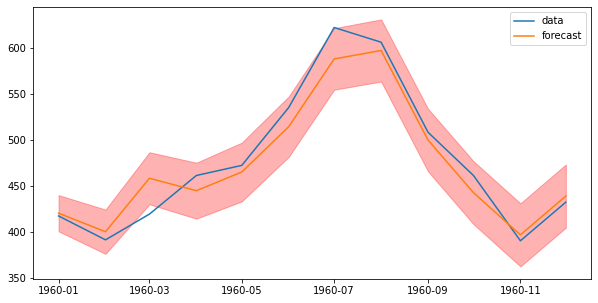

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index,test['Passengers'],label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

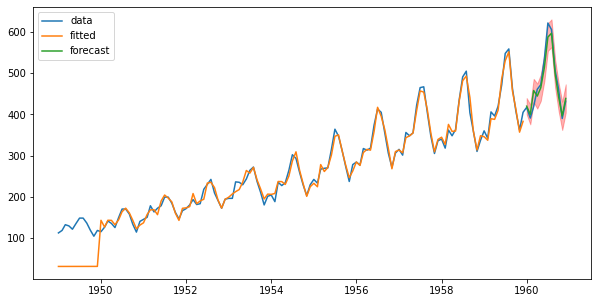

In [12]:
train_pred=model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df["Passengers"], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)

ax.legend()

In [13]:
logmodel = pm.auto_arima(train['LogPassengers'],
                         trace=True,
                         suppress_warnings=True,
                         seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.663, Time=2.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.53 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=1.86 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.91 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=4.90 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=1.78 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=4.79 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.502, Time=1.68 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.47 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-441.068, Time=1.88 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.512, Time=6.75 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [14]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Tue, 11 Jan 2022   AIC                           -448.052
Time:                                      02:05:29   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.155      0.031       0.002       0.037
ar.L1          0.5997      0.083      7.263      0.000       0.438       0.762
ar.L2          0.2422      0.085      2.858      0.004       0.076       0.408
ma.S.L12      -0.5683      0.105     -5.436      0.000      -0.773      -0.363
sigma2         0.0012      0.000      8.194      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.07
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

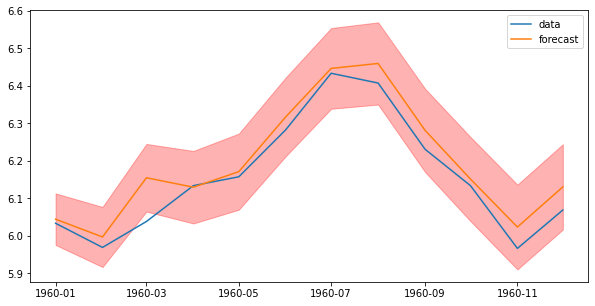

In [15]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test["LogPassengers"], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

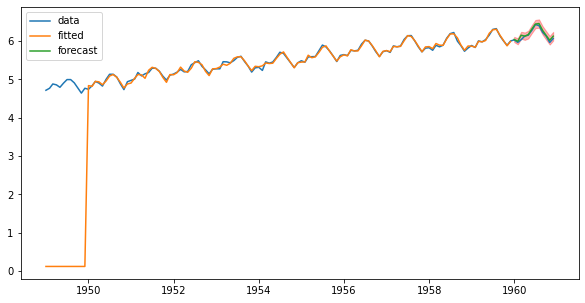

In [16]:
train_pred_log=logmodel.predict_in_sample(start=0,end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df["LogPassengers"], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)

ax.legend()

In [17]:
#forecast rmse
def rmse(t, y):
  return np.sqrt(np.mean((t-y)**2))

In [18]:
print("Non logged RMSE:", rmse(test['Passengers'],test_pred))
print("Logged RMSE:", rmse(test['Passengers'],np.exp(test_pred_log)))

Non logged RMSE: 18.536468964799457
Logged RMSE: 23.051734622075276


In [19]:
# non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12,max_q=2,max_order=14,
                      stepwise=True,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-222.099, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-217.708, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-215.917, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-228.902, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-217.540, T

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.478
Date:                Tue, 11 Jan 2022   AIC                           -250.956
Time:                        02:05:37   BIC                           -227.955
Sample:                             0   HQIC                          -241.610
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0102      0.002      5.365      0.000       0.006       0.014
ar.L1          0.0419      0.121      0.346      0.729      -0.196       0.279
ar.L2          0.4491      0.115      3.895      0.000       0.223       0.675
ar.L3         -0.2337      0.099     -2.369      0.018      -0.427      -0.040
ar.L4         -0.2501      0.106     -2.354      0.019      -0.458      -0.042
ma.L1         -0.0467      0.078     -0.597      0.551      -0.200       0.107
ma.L2         -0.8622      0.076    -11.276      0.000      -1.012      -0.712
sigma2         0.0075      0.001      5.522      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.70
Prob(Q):                              0.96   Prob(JB):                         0.06
Heteroskedasticity (H):               1.03   Skew:                             0.23
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

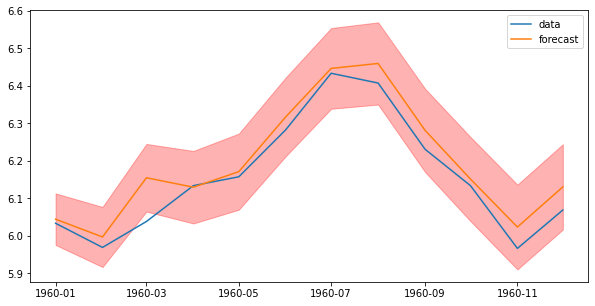

In [21]:
test_pred, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test["LogPassengers"], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

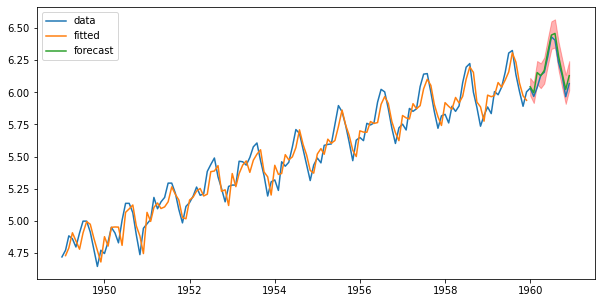

In [22]:
train_pred=model.predict_in_sample(start=1,end=-1)
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.index,df['LogPassengers'],label='data')
ax.plot(train.index[1:],train_pred,label='fitted')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index, \
                confint[:,0],confint[:,1],
                color='red',alpha=0.3)
ax.legend()

In [23]:
rmse(test['Passengers'], np.exp(test_pred))

23.051734622075276